In [1]:
from datasets import load_dataset, load_metric
import pandas as pd
from datasets import Dataset, DatasetDict
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud


# EDA for Tamil Dataset - Samanantar

## Load the Dataset

In [2]:
raw_dataset = load_dataset('ai4bharat/samanantar', 'ta', split='train', streaming=True, trust_remote_code=True)

In [3]:
limited_data = raw_dataset.take(200000)

In [4]:
limited_data

IterableDataset({
    features: ['idx', 'src', 'tgt'],
    n_shards: 1
})

In [5]:
# Convert the IterableDataset to a list
limited_data_list = list(limited_data)

# Create a Dataset from the list
limited_data = Dataset.from_list(limited_data_list)

# Create a DatasetDict
dataset_dict = DatasetDict({"train": limited_data})

# Verify the first example to ensure conversion was successful
print(dataset_dict["train"][0])

{'idx': 0, 'src': 'Some 14 months later, the second calf is born.', 'tgt': 'சுமார் 14 மாதங்கள் கழித்து, இரண்டாம் கன்றை ஈனுகிறது.'}


In [6]:
# Convert the dataset to a Pandas DataFrame
train_df = dataset_dict["train"].to_pandas()

# Rename the columns
train_df = train_df.rename(columns={"src": "en", "tgt": "ta"})

# Drop the 'idx' column if it is not needed
tamil_df = train_df.drop(columns=["idx"])

# Display the first few rows to verify
tamil_df.head()

,en,ta
0,"Some 14 months later, the second calf is born.","சுமார் 14 மாதங்கள் கழித்து, இரண்டாம் கன்றை ஈனு..."
1,"""Senior advocate Kapil Sibal, who was appearin...",‘காா்த்தி சிதம்பரம் எம். பி. யாக உள்ளதால் எங்க...
2,This photo was taken then.,அதன்போது எடுக்கப்பட்ட புகைப்படம் இது.
3,So far two rounds of the JWG meeting have been...,இதுவரை இணைப் பணிக் குழு இரண்டுகட்ட பேச்சுவார்த...
4,The life of the world is nothing but play and ...,உலக வாழ்க்கை வீணும் விளையாட்டுமேயன்றி வேறில்லை...


## Check Unique and Null Values

In [7]:
tamil_df.describe()

,en,ta
count,200000,200000
unique,181562,198657
top,Police are carrying out further investigation ...,[ கேள்விகள்]
freq,115,29


In [8]:
print(tamil_df.isnull().sum())


en    0
ta    0
dtype: int64


## Plot Sentence Lengths

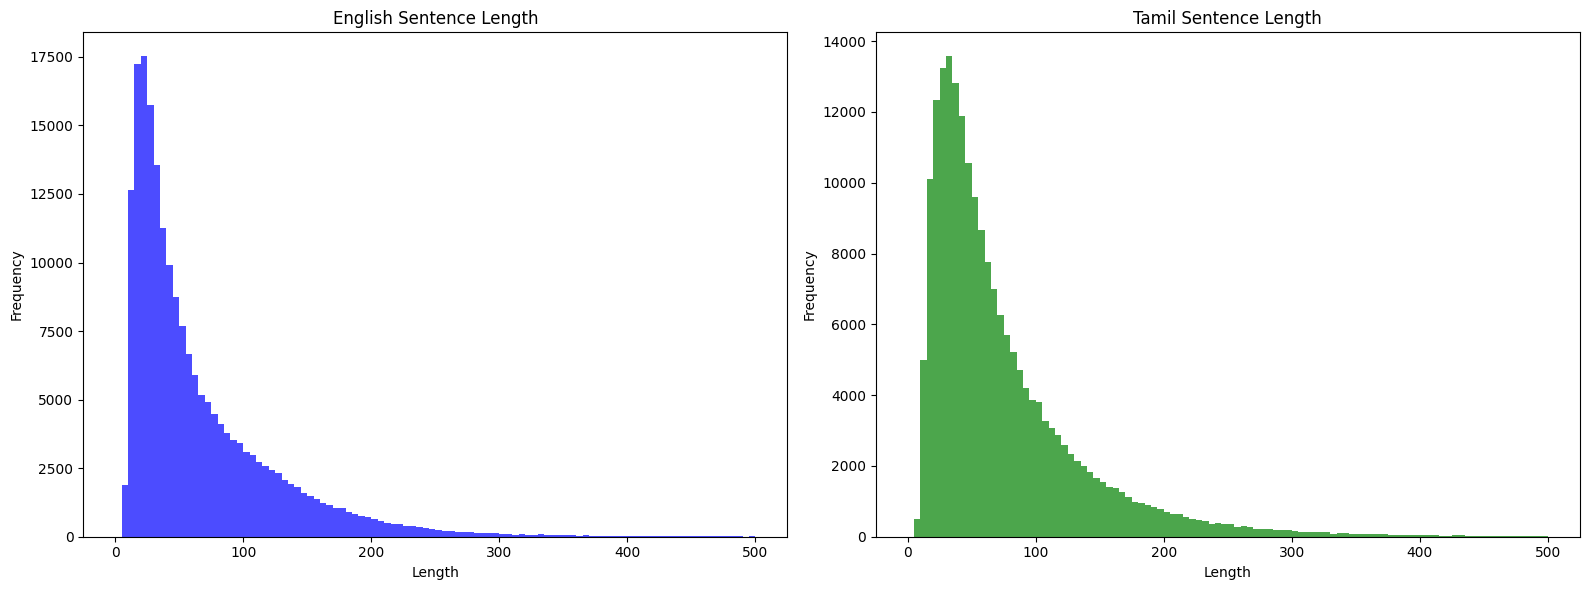

In [9]:
tamil_df['en_length'] = tamil_df['en'].apply(len)
tamil_df['ta_length'] = tamil_df['ta'].apply(len)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(tamil_df['en_length'], bins=100, range=(0, 500), color='blue', alpha=0.7)
plt.title('English Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(tamil_df['ta_length'], bins=100, range=(0, 500), color='green', alpha=0.7)
plt.title('Tamil Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## Plot Correlation between English and Tamil Sentence Lengths

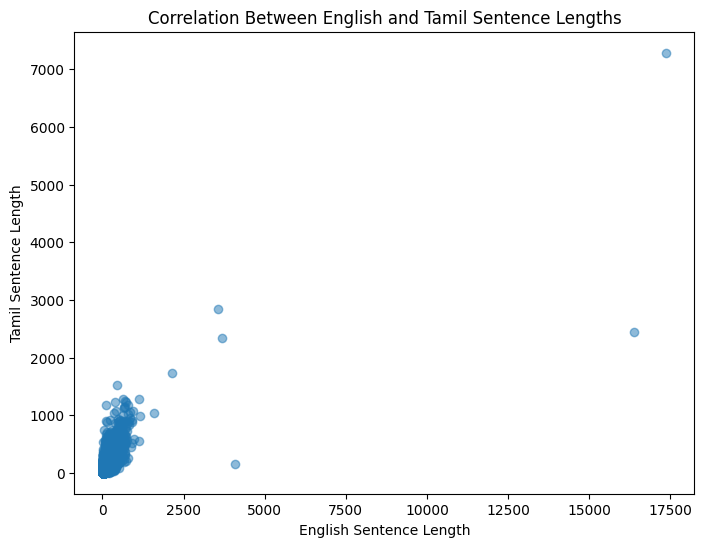

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(tamil_df['en_length'], tamil_df['ta_length'], alpha=0.5)
plt.title('Correlation Between English and Tamil Sentence Lengths')
plt.xlabel('English Sentence Length')
plt.ylabel('Tamil Sentence Length')
plt.show()


## Most Commonly Occuring Words

In [11]:
import pandas as pd

from collections import Counter

en_words = ' '.join(tamil_df['en']).split()
ta_words = ' '.join(tamil_df['ta']).split()

en_word_freq = Counter(en_words)
ta_word_freq = Counter(ta_words)

# Most common English words
en_common_words = en_word_freq.most_common(10)
ta_common_words = ta_word_freq.most_common(10)

# Create DataFrames for better presentation
en_df = pd.DataFrame(en_common_words, columns=['Word', 'Frequency'])
ta_df = pd.DataFrame(ta_common_words, columns=['Word', 'Frequency'])

print("Most Common English Words:")
print(en_df)

print("\nMost Common Tamil Words:")
print(ta_df)


Most Common English Words:
   Word  Frequency
0   the     113402
1    of      63962
2   and      52820
3    to      52379
4    in      44509
5     a      34573
6    is      33093
7   The      24888
8   for      19846
9  that      15875

Most Common Tamil Words:
      Word  Frequency
0  மற்றும்      13952
1     இந்த      11368
2      ஒரு      10287
3    என்று       8733
4      இது       6681
5     அவர்       6296
6     நான்       4767
7        -       4379
8       என       4356
9    ஆனால்       4238


## Size of the Vocabulary

In [12]:
en_vocab_size = len(set(' '.join(tamil_df['en']).split()))
ta_vocab_size = len(set(' '.join(tamil_df['ta']).split()))

print(f'English Vocabulary Size: {en_vocab_size}')
print(f'Tamil Vocabulary Size: {ta_vocab_size}')


English Vocabulary Size: 147286
Tamil Vocabulary Size: 307509


## Check Duplicate Rows

In [13]:
duplicate_rows = tamil_df[tamil_df.duplicated(['en', 'ta'])]
print(f'Number of duplicate rows: {len(duplicate_rows)}')


Number of duplicate rows: 0


# EDA for Telugu Dataset - Samanantar

## Load the Dataset

In [14]:
raw_dataset = load_dataset('ai4bharat/samanantar', 'te', split='train', streaming=True, trust_remote_code=True)

In [15]:
limited_data = raw_dataset.take(200000)

In [16]:
limited_data

IterableDataset({
    features: ['idx', 'src', 'tgt'],
    n_shards: 1
})

In [17]:
# Convert the IterableDataset to a list
limited_data_list = list(limited_data)

# Create a Dataset from the list
limited_data = Dataset.from_list(limited_data_list)

# Create a DatasetDict
dataset_dict = DatasetDict({"train": limited_data})

# Verify the first example to ensure conversion was successful
print(dataset_dict["train"][0])

{'idx': 0, 'src': 'Have you heard about Foie gras?', 'tgt': 'ఇక ఫ్రూట్ ఫ్లైస్ గురించి మీరు విన్నారా?'}


In [18]:
# Convert the dataset to a Pandas DataFrame
train_df = dataset_dict["train"].to_pandas()

# Rename the columns
train_df = train_df.rename(columns={"src": "en", "tgt": "te"})

# Drop the 'idx' column if it is not needed
telugu_df = train_df.drop(columns=["idx"])

# Display the first few rows to verify
telugu_df.head()

,en,te
0,Have you heard about Foie gras?,ఇక ఫ్రూట్ ఫ్లైస్ గురించి మీరు విన్నారా?
1,I never thought of acting in films.,సూర్య సినిమాల్లో నటించాలని ఎప్పుడూ అనుకోలేదు.
2,Installed Software,స్థాపించబడిన సాఫ్ట్‍వేర్
3,A case has been registered under Sections 302 ...,నిందితులపై సెక్షన్ 376 మరియు 302ల కింద కేసు నమ...
4,"Of this, 10 people succumbed to the injuries.",అందులో 10 మంది తీవ్రంగా గాయపడ్డారు.


## Check Unique and Null Values

In [19]:
telugu_df.describe()

,en,te
count,200000,200000
unique,174956,199688
top,For every Rs.,[ అధ్యయన ప్రశ్నలు]
freq,56,6


In [20]:
print(telugu_df.isnull().sum())

en    0
te    0
dtype: int64


## Plot Sentence Lengths

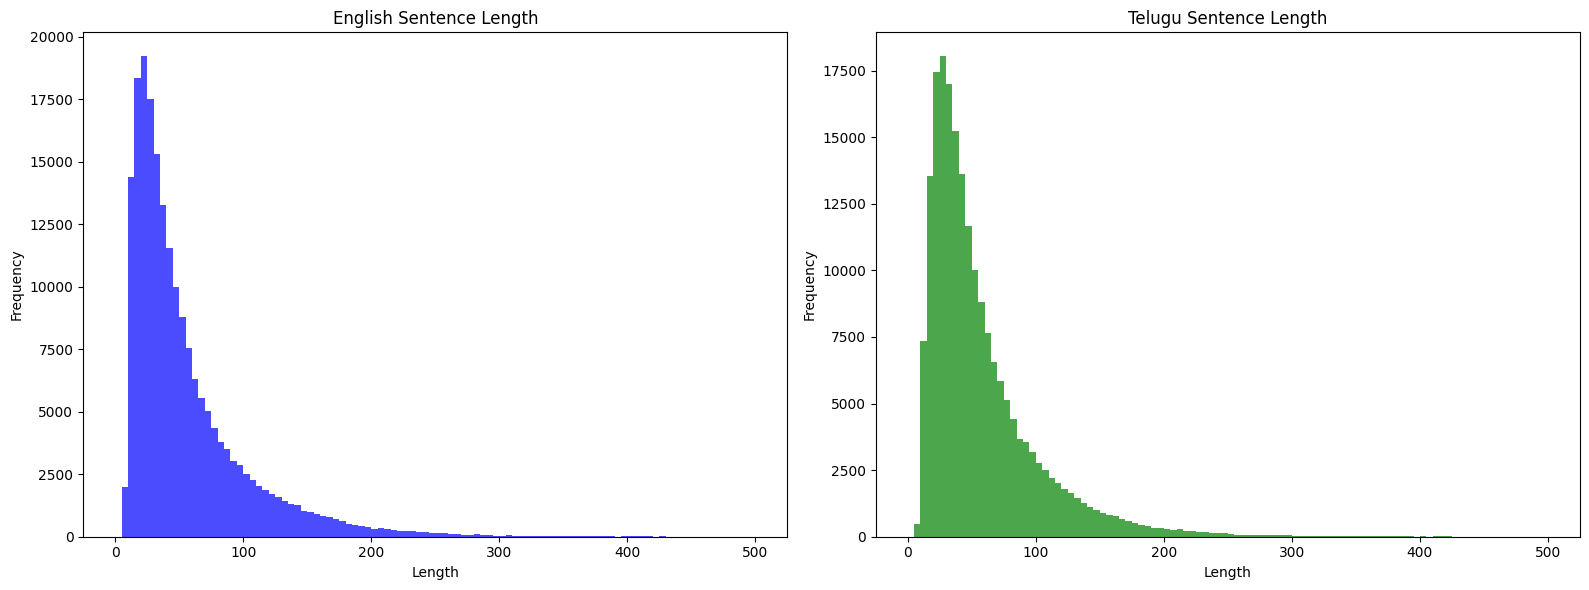

In [21]:
telugu_df['en_length'] = telugu_df['en'].apply(len)
telugu_df['te_length'] = telugu_df['te'].apply(len)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(telugu_df['en_length'], bins=100, range=(0, 500), color='blue', alpha=0.7)
plt.title('English Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(telugu_df['te_length'], bins=100, range=(0, 500), color='green', alpha=0.7)
plt.title('Telugu Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## Plot Correlation between English and Telugu Sentences

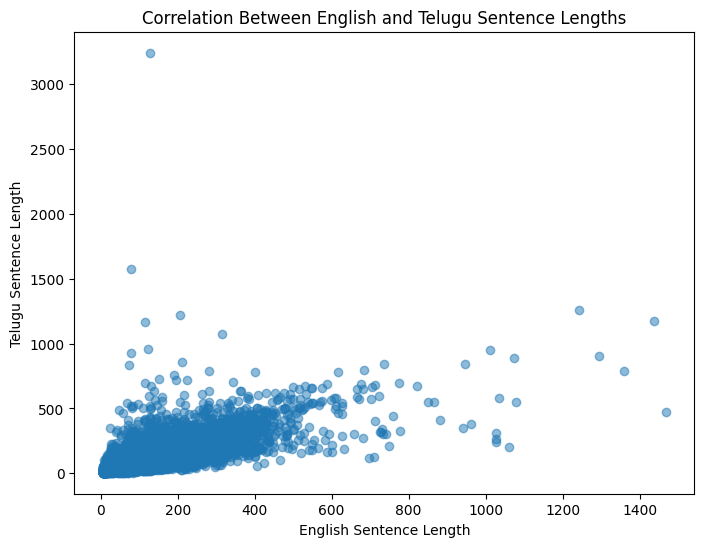

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(telugu_df['en_length'], telugu_df['te_length'], alpha=0.5)
plt.title('Correlation Between English and Telugu Sentence Lengths')
plt.xlabel('English Sentence Length')
plt.ylabel('Telugu Sentence Length')
plt.show()


## Most Commonly Occuring Words

In [23]:
import pandas as pd

from collections import Counter

en_words = ' '.join(telugu_df['en']).split()
te_words = ' '.join(telugu_df['te']).split()

en_word_freq = Counter(en_words)
te_word_freq = Counter(te_words)

# Most common English words
en_common_words = en_word_freq.most_common(10)
te_common_words = te_word_freq.most_common(10)

# Create DataFrames for better presentation
en_df = pd.DataFrame(en_common_words, columns=['Word', 'Frequency'])
te_df = pd.DataFrame(te_common_words, columns=['Word', 'Frequency'])

print("Most Common English Words:")
print(en_df)

print("\nMost Common Telugu Words:")
print(te_df)


Most Common English Words:
  Word  Frequency
0  the      97720
1   of      45614
2  and      40940
3   to      39711
4   in      38542
5   is      32188
6  The      29068
7    a      27984
8  for      14635
9  has      13847

Most Common Telugu Words:
    Word  Frequency
0      ఈ      24902
1   కూడా       7716
2      ఆ       6302
3  మరియు       6070
4     ఒక       5126
5    ఇది       4992
6    ఆయన       4695
7    రూ.       4239
8    అని       3925
9   చాలా       3923


## Size of the Vocabulary

In [24]:
en_vocab_size = len(set(' '.join(telugu_df['en']).split()))
te_vocab_size = len(set(' '.join(telugu_df['te']).split()))

print(f'English Vocabulary Size: {en_vocab_size}')
print(f'Telugu Vocabulary Size: {te_vocab_size}')


English Vocabulary Size: 122539
Telugu Vocabulary Size: 254252


## Check Duplicate Rows

In [25]:
duplicate_rows = telugu_df[telugu_df.duplicated(['en', 'te'])]
print(f'Number of duplicate rows: {len(duplicate_rows)}')


Number of duplicate rows: 0


# EDA for Hindi Dataset - Samanantar

In [26]:
raw_dataset = load_dataset('ai4bharat/samanantar', 'hi', split='train', streaming=True, trust_remote_code=True)

In [27]:
limited_data = raw_dataset.take(200000)

In [28]:
limited_data

IterableDataset({
    features: ['idx', 'src', 'tgt'],
    n_shards: 1
})

In [29]:
# Convert the IterableDataset to a list
limited_data_list = list(limited_data)

# Create a Dataset from the list
limited_data = Dataset.from_list(limited_data_list)

# Create a DatasetDict
dataset_dict = DatasetDict({"train": limited_data})

# Verify the first example to ensure conversion was successful
print(dataset_dict["train"][0])

{'idx': 0, 'src': "However, Paes, who was partnering Australia's Paul Hanley, could only go as far as the quarterfinals where they lost to Bhupathi and Knowles", 'tgt': 'आस्ट्रेलिया के पाल हेनली के साथ जोड़ी बनाने वाले पेस मियामी में क्वार्टरफाइनल तक ही पहुंच सके क्योंकि इस दौर में उन्हें भूपति और नोल्स ने हराया था।'}


In [30]:
# Convert the dataset to a Pandas DataFrame
train_df = dataset_dict["train"].to_pandas()

# Rename the columns
train_df = train_df.rename(columns={"src": "en", "tgt": "hi"})

# Drop the 'idx' column if it is not needed
hindi_df = train_df.drop(columns=["idx"])

# Display the first few rows to verify
hindi_df.head()

,en,hi
0,"However, Paes, who was partnering Australia's ...",आस्ट्रेलिया के पाल हेनली के साथ जोड़ी बनाने वाल...
1,"Whosoever desires the reward of the world, wit...",और जो शख्स (अपने आमाल का) बदला दुनिया ही में च...
2,The value of insects in the biosphere is enorm...,"जैव-मंडल में कीड़ों का मूल्य बहुत है, क्योंकि ..."
3,Mithali To Anchor Indian Team Against Australi...,आस्ट्रेलिया के खिलाफ वनडे टीम की कमान मिताली को
4,After the assent of the Honble President on 8t...,"8 सितम्‍बर, 2016 को माननीय राष्‍ट्रपति की स्‍व..."


## Check Unique and Null Values

In [31]:
hindi_df.describe()

,en,hi
count,200000,200000
unique,193700,198932
top,Krishnapuram is a village in Krishna district ...,हमने उनके लिए कुछ साथी नियुक्त कर दिए थे। फिर ...
freq,18,5


In [32]:
print(hindi_df.isnull().sum())

en    0
hi    0
dtype: int64


## Plot Sentences Lengths

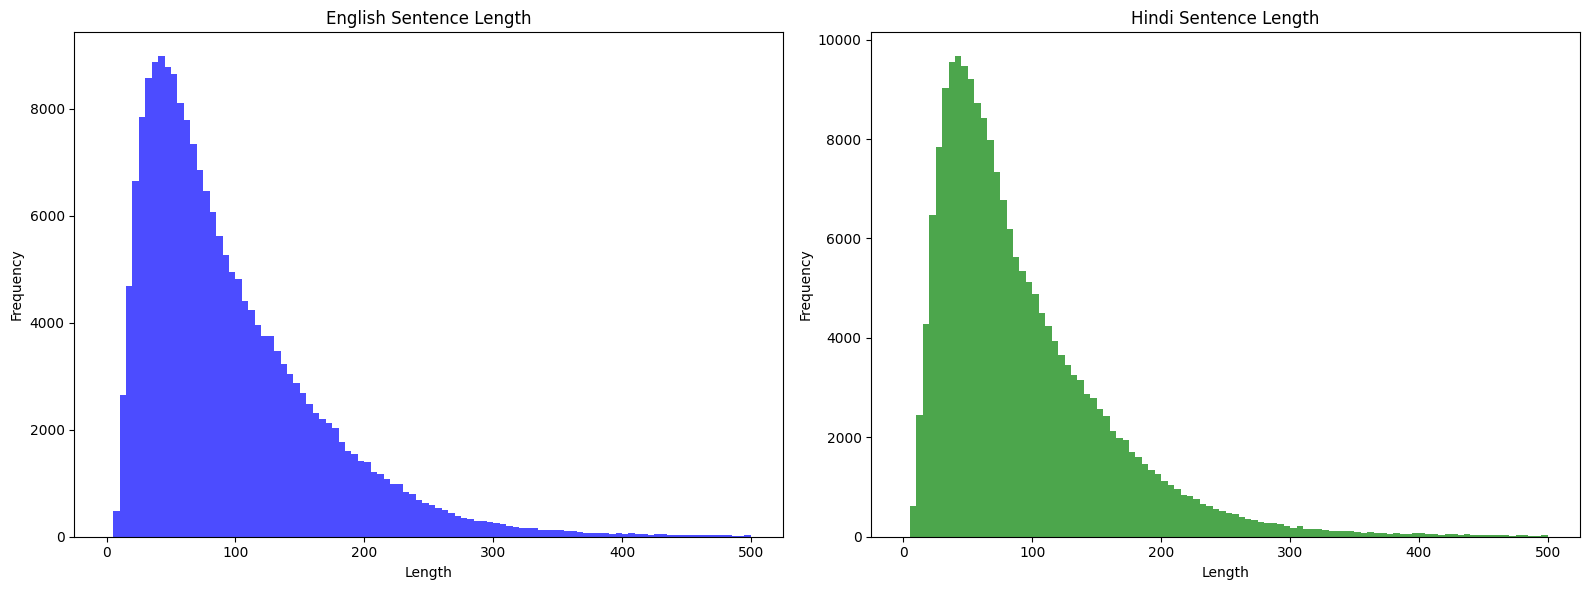

In [33]:
hindi_df['en_length'] = hindi_df['en'].apply(len)
hindi_df['hi_length'] = hindi_df['hi'].apply(len)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(hindi_df['en_length'], bins=100, range=(0, 500), color='blue', alpha=0.7)
plt.title('English Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(hindi_df['hi_length'], bins=100, range=(0, 500), color='green', alpha=0.7)
plt.title('Hindi Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## Plot Correlation between English and Hindi Sentences

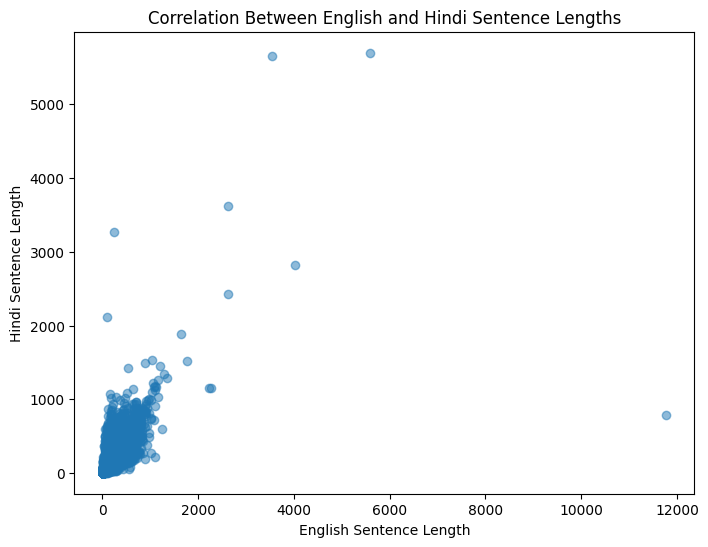

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(hindi_df['en_length'], hindi_df['hi_length'], alpha=0.5)
plt.title('Correlation Between English and Hindi Sentence Lengths')
plt.xlabel('English Sentence Length')
plt.ylabel('Hindi Sentence Length')
plt.show()


## Most Commonly Occuring Words

In [35]:
import pandas as pd

from collections import Counter

en_words = ' '.join(hindi_df['en']).split()
hi_words = ' '.join(hindi_df['hi']).split()

en_word_freq = Counter(en_words)
hi_word_freq = Counter(hi_words)

# Most common English words
en_common_words = en_word_freq.most_common(10)
hi_common_words = hi_word_freq.most_common(10)

# Create DataFrames for better presentation
en_df = pd.DataFrame(en_common_words, columns=['Word', 'Frequency'])
hi_df = pd.DataFrame(hi_common_words, columns=['Word', 'Frequency'])

print("Most Common English Words:")
print(en_df)

print("\nMost Common Hindi Words:")
print(hi_df)


Most Common English Words:
  Word  Frequency
0  the     179281
1   of     101834
2  and      87450
3   to      75597
4   in      69772
5    a      49033
6   is      38957
7  The      32845
8  for      30376
9   on      25070

Most Common Hindi Words:
  Word  Frequency
0   के     153185
1  में     106571
2   की      85609
3   और      74981
4   को      61170
5   से      56264
6   ने      49668
7   का      46412
8  है।      44141
9   पर      37271


## Size of the Vocabulary

In [36]:
en_vocab_size = len(set(' '.join(hindi_df['en']).split()))
hi_vocab_size = len(set(' '.join(hindi_df['hi']).split()))

print(f'English Vocabulary Size: {en_vocab_size}')
print(f'Hindi Vocabulary Size: {hi_vocab_size}')


English Vocabulary Size: 191964
Hindi Vocabulary Size: 186926


## Check Duplicate Rows

In [37]:
duplicate_rows = hindi_df[hindi_df.duplicated(['en', 'hi'])]
print(f'Number of duplicate rows: {len(duplicate_rows)}')


Number of duplicate rows: 0
